# Atticus Soane
# Finite Difference Methods (2)
# Problem 1


Consider the one way wave equation $$u_{t} + u_{x} = 0$$ on the interval $[-1,3]$ with $t \geq 0$. Two sets of initial conditions: $$i)\:u(x, 0) = \begin{cases} 1 - |x| & \text{if} |x| \leq 1\\ 0 & \text{otherwise} \end{cases}$$ $$ii)\:u(x, 0) = e^{-5x^{2}}$$

# Part a)
Use the foward-time forward-space scheme $$\frac{v_{j}^{n+1} - v_{j}^{n}}{k} + \frac{v_{j+1}^{n} -v_{j}^{n}}{h} = 0$$ with right point boundary condition $v_{M}^{n+1} = v_{M-1}^{n+1}, \: x_{M} = 3,\: h= 0.02,\: \lambda = \frac{k}{h} = 0.8$

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#these two functions are designed to implement the two different initial conditions given in the problem. Both
#functions take an input of an x-value, and the output is the value of the function at the given x. 
def I_1(x):
    if np.abs(x) <= 1:
        return(1 - np.abs(x))
    else:
        return(0)
def I_2(x):
    val = -5 * (x**2)
    return(np.e ** val)


In [3]:
#the function below is designed to carry out the forward time, forward space finite difference method laid out in the
#problem. As inputs, it takes I, the initial condition function to be used, lower and upper, the boundaries for x, 
#h, the length of the x-step, T, the value of T the final approximation will be for, and k, the time step length. 
#the outputs will be the range of x-values used (for plotting purposes), and u, the approximation of the function
#u at the given T
def ftfs(I, lower, upper, h, T, k):
    x_range = upper - lower #these lines of code generated equispaced nodes with the given h value
    M = int(x_range/h)
    x_vals = np.linspace(lower, upper, M+1)
    lam = k/h
    N = int(T/k)
    u0 = np.zeros(len(x_vals)) #generates list of zeros for initial condition
    u = np.zeros(len(x_vals)) #generates list of zeros to be updated at each time step u^n+1
    for i in range(len(x_vals)): #sets the initial condition
        u0[i] = I(x_vals[i])
    for k in range(N):
        for i in range(M): #generates the values provided by the scheme
            u[i] = u0[i] - (lam * (u0[i + 1] - u0[i]))
        u[-1] = u[-2] #updates the right boundary condition
        u0 = u #updates the u values for the next time step
    return(x_vals, u)
        
        

# Below are three approximations generated at different time steps using the first initial data set: i

Text(0.5, 1.0, '1 Time Step')

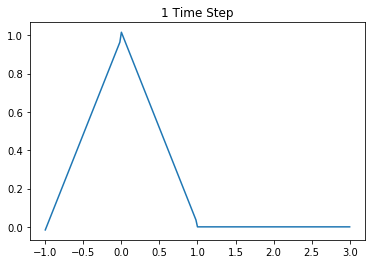

In [4]:
x1, u1 = ftfs(I_1, -1, 3, .02, .016, .016)
plt.plot(x1, u1)
plt.title("1 Time Step")

Text(0.5, 1.0, '5 Time Steps')

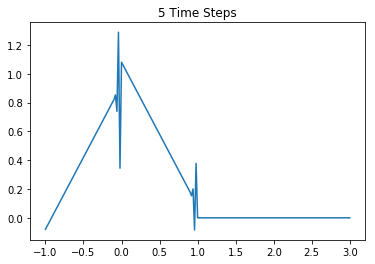

In [5]:
x2, u2 = ftfs(I_1, -1, 3, .02, .080, .016)
plt.plot(x2, u2)
plt.title("5 Time Steps")

Text(0.5, 1.0, '10 Time Steps')

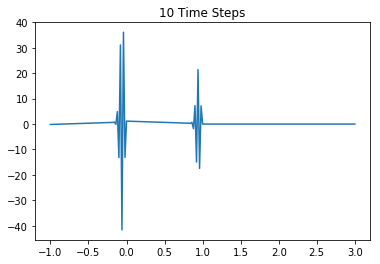

In [6]:
x3, u3 = ftfs(I_1, -1, 3, .02, .16, .016)
plt.plot(x3, u3)
plt.title("10 Time Steps")

# Below are four different approximations generated at different time steps using the initial data set: ii

Text(0.5, 1.0, '1 Time Step')

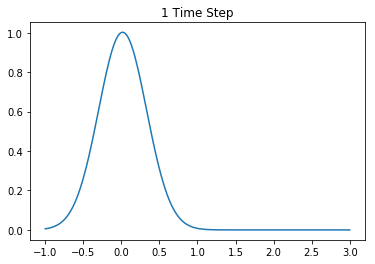

In [7]:
x4, u4 = ftfs(I_2, -1, 3, .02, .016, .016)
plt.plot(x4, u4)
plt.title("1 Time Step")

Text(0.5, 1.0, '5 Time Steps')

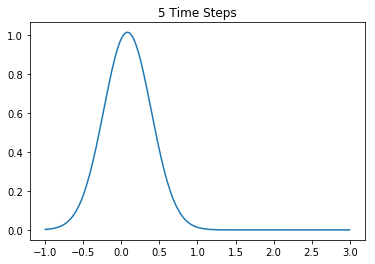

In [8]:
x5, u5 = ftfs(I_2, -1, 3, .02, .080, .016)
plt.plot(x5, u5)
plt.title("5 Time Steps")

Text(0.5, 1.0, '10 Time Steps')

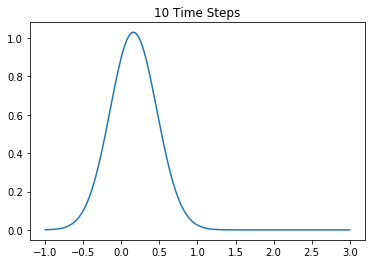

In [9]:
x6, u6 = ftfs(I_2, -1, 3, .02, .16, .016)
plt.plot(x6, u6)
plt.title("10 Time Steps")

Text(0.5, 1.0, '40 Time Steps')

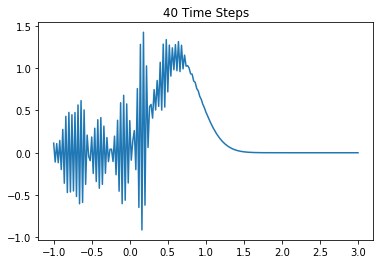

In [10]:
x7, u7 = ftfs(I_2, -1, 3, .02, .64, .016)
plt.plot(x7, u7)
plt.title("40 Time Steps")

As can be seen in the figures above, the less-smooth data (i) shows signs of instability even after only 1 time step, and the instability is greatly amplified each time the number of time steps increases. With the smooth data (ii), the instability does not appear after 1, 5 or even 10 time steps. However, when plotted at 40 time steps, it becomes apparent that the scheme is unstable. 

# Part b)
Comment on the locatization of the onset of instability for the initial data i) and give an estimate of the expected growth rate of the instability per time step. 

There are two values of $x$ around which instability occurs at each approximation for the initial data set i), regardless of how many time steps are taken. The curves are smooth with the exception of near $x=0$ and $x=1$, where there is clear instability. To attempt to estimate the expected growth rate of instability per time step, von Neumann analysis will help visualize it: $$U_{j}^{n} = g^{n}e^{imjh}$$. Subsituting into the finite difference scheme: $$g^{n+1}e^{imjh} - g^{n}e^{imjh} = \lambda \bigg(g^{n}e^{im(j+1)h} - g^{n}e^{imjh}\bigg)$$ Factoring out $g^{n}e^{imjh}$ and using an identity for $e^{imh} - e^{-imh}$: $$g = 2\lambda cos(mh) + 1$$ Clearly, this scheme is unstable, as with $\lambda \neq 0$, $|g(m)| \geq 1$, and thus the instabiltity will grow exponentially as the time step increases. 

# Part c)
Using the left boundary condition $u(-1) = 0$ write a stable scheme and compute the corresponding approximations for data sets i) and ii), plot the approximations at representative time steps, and again use $h = 0.02$ and $\lambda = \frac{k}{h} = 0.8$

A stable scheme for this equation can be written easily by using the left boundary condition and implementing a forward-time backward-space scheme: $$U_{j}^{n+1} = U_{j}^{n} - \lambda\bigg(U_{j}^{n} - U_{j-1}^{n}\bigg)$$ This scheme is conditionally stable, the condition being that $|\lambda| \leq 1$, which in this case is true because $\lambda = 0.8 \lt 1$. 

In [20]:
#the function below is designed to implement the stable finite difference method scheme seen above. The inputs are
#I, the function to set the initial condition, lower and upper, the bounds of the x-range, h, the length of the x-step,
#T, the length of time to approximate at, and k, the length of the time step. The outputs are the x-range used 
#and the approximation to U at the given time step.
def stable(I, lower, upper, h, T, k):
    x_range = upper - lower #these lines of code generated equispaced nodes with the given h value
    M = int(x_range/h)
    x_vals = np.linspace(lower, upper, M+1)
    lam = k/h
    N = int(T/k)
    u0 = np.zeros(len(x_vals)) #generates list of zeros for initial condition
    u = np.zeros(len(x_vals)) #generates list of zeros to be updated at each time step u^n+1
    for i in range(len(x_vals)): #sets the initial condition
        u0[i] = I(x_vals[i])
    for k in range(N):
        for i in range(1, M+1): #generates the values provided by the scheme
            u[i] = u0[i] - (lam * (u0[i] - u0[i-1]))
        u[0] = 0 #sets the left boundary condition
        u0[:] = u #updates for the next time step
    return(x_vals, u)
    

# Below are four approximations generated using the stable scheme at different time steps using the first initial data set: i

Text(0.5, 1.0, '1 Time Step')

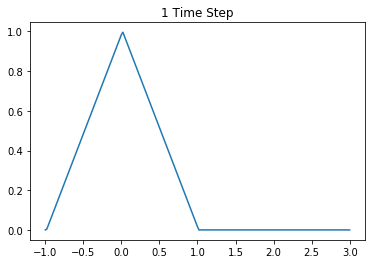

In [21]:
x_s1, u_s1 = stable(I_1, -1, 3, 0.02, 0.016, 0.016)
plt.plot(x_s1, u_s1)
plt.title("1 Time Step")

Text(0.5, 1.0, '5 Time Steps')

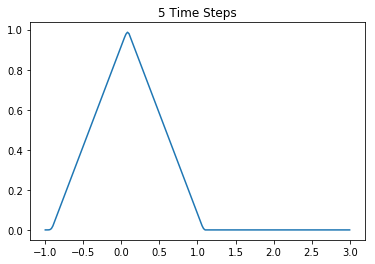

In [22]:
xs2, us2 = stable(I_1, -1, 3, .02, .080, .016)
plt.plot(xs2, us2)
plt.title("5 Time Steps")

Text(0.5, 1.0, '10 Time Steps')

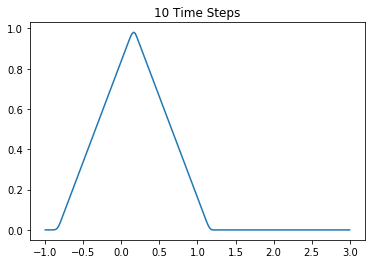

In [23]:
xs3, us3 = stable(I_1, -1, 3, .02, .16, .016)
plt.plot(xs3, us3)
plt.title("10 Time Steps")

Text(0.5, 1.0, '100 Time Steps')

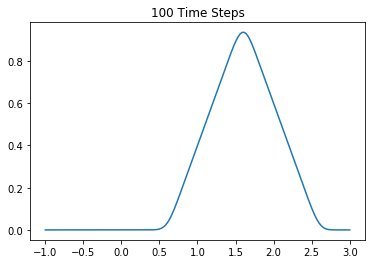

In [24]:
xs4, us4 = stable(I_1, -1, 3, .02, 1.60, .016)
plt.plot(xs4, us4)
plt.title("100 Time Steps")

# Below are four different approximations generated at different time steps using the initial data set: ii

Text(0.5, 1.0, '1 Time Step')

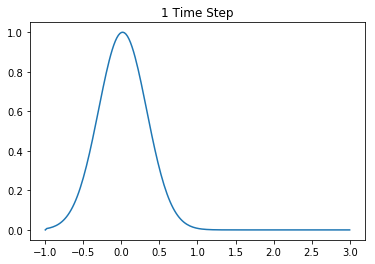

In [25]:
xs5, us5 = stable(I_2, -1, 3, .02, .016, .016)
plt.plot(xs5, us5)
plt.title("1 Time Step")

Text(0.5, 1.0, '5 Time Steps')

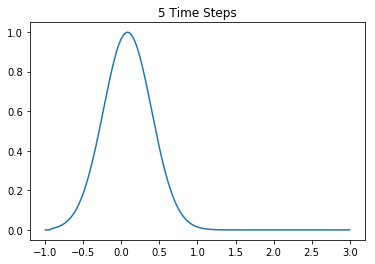

In [26]:
xs6, us6 = stable(I_2, -1, 3, .02, .080, .016)
plt.plot(xs6, us6)
plt.title("5 Time Steps")

Text(0.5, 1.0, '10 Time Steps')

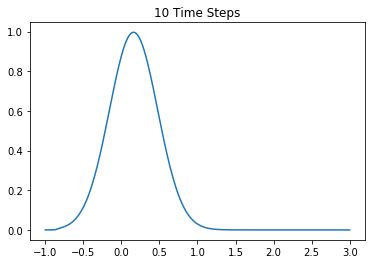

In [27]:
xs7, us7 = stable(I_2, -1, 3, .02, 0.16, .016)
plt.plot(xs7, us7)
plt.title("10 Time Steps")

Text(0.5, 1.0, '100 Time Steps')

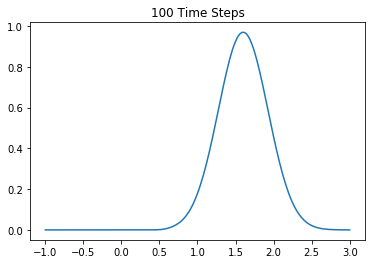

In [28]:
xs8, us8 = stable(I_2, -1, 3, .02, 1.60, .016)
plt.plot(xs8, us8)
plt.title("100 Time Steps")